# Project 1: Seattle AirBnB
### Main Questions
##### (1) - What is the most expensive rooms in seattle splited by the type of accomodation?
##### (2) - How is the price´s variation by the month splited by the type accomodation?

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [31]:
df_cld = pd.read_csv('calendar.csv')
df_lst = pd.read_csv('listings.csv')

In [32]:
df_cld.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [33]:
df_lst.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

### A - Creating a dataset which one I´ll use to analisys

##### A.1 - Treatment of datasets: Calendar and Listning

###### A.1.1 - Treatmen of calendar dataset

In [34]:
df_cld['price'] = df_cld['price'].str.replace('[\$\,]', '').astype('float64')

In [35]:
df_cld['date'] = pd.to_datetime(df_cld['date'])

In [36]:
df_cld['month'] = df_cld.date.dt.month

###### A.1.2 - Teatment of linstings dataset

In [37]:
df_lst.rename(columns = {'id' : 'listing_id'}, inplace = True)

In [38]:
df_analysis = pd.merge(df_cld, df_lst.loc[:, ['listing_id', 'property_type', 'room_type', 'bedrooms']], on = 'listing_id', how = 'left')

In [39]:
df_analysis['bedrooms'] = df_analysis['bedrooms'].replace(0, df_analysis['bedrooms'].mean())

###### A.1.3 - Creating the dataset which will be analised 

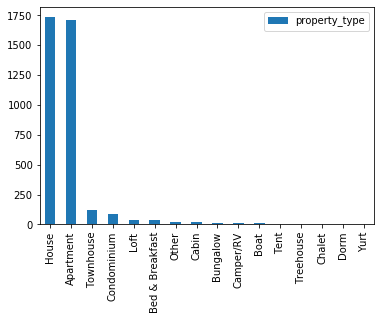

In [40]:
df_prop_type = df_analysis['property_type'].value_counts() / 365
df_prop_type = pd.DataFrame(df_prop_type)
df_prop_type.plot(kind='bar')

In [41]:
df_analysis['bedrooms_price'] = df_analysis['price'] / df_analysis['bedrooms']

In [42]:
df_plot = df_analysis.groupby(['property_type', 'month'])['bedrooms_price'].mean() 
#df_plot1 = pd.DataFrame(df_plot['House']).reset_index()
#df_plot1['prec_raise'] = (df_plot1['bedrooms_price'] - df_plot1.iloc[0,1]) / df_plot1['bedrooms_price']

#y = list(df_plot1['bedrooms_price'])
#y


In [79]:
plt.fig()
price 
count = 0

for prop_type in list(df_prop_type.index[:4]):
    df_plot1 = pd.DataFrame(df_plot[prop_type]).reset_index()
    df_plot1['prec_raise'] = (df_plot1['bedrooms_price'] - df_plot1.iloc[0,1]) / df_plot1['bedrooms_price']
    
    x= list(df_plot1['month'])
    y1= list(df_plot1['bedrooms_price']) 
    y2= list(df_plot1['prec_raise'])
        
    ax[0].plot(x,y1, label = prop_type)
    ax[1].plot(x,y2, label = prop_type)
    
    count += 1
    
ax[0].legend()
ax[1].legend()
plt.show()


AttributeError: module 'matplotlib.pyplot' has no attribute 'fig'